### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv',encoding='unicode_escape') # to avoid encoding error, use 'unicode_escape'
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [6]:
df[df['name'].isna()==1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,MichaÃ«l,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [7]:
df['name']=df['name'].fillna(0)

In [8]:
df['host_name']=df['host_name'].fillna(0)

In [9]:
pd.isnull(df).sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

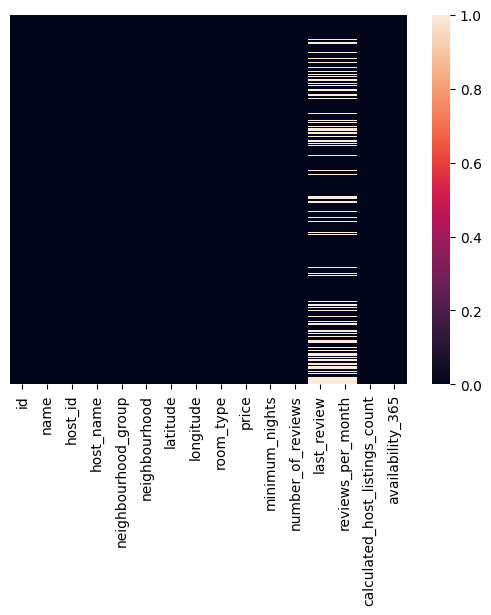

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
df=df.dropna()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,HâAi,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [12]:
df.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
48782    False
48790    False
48799    False
48805    False
48852    False
Length: 38843, dtype: bool

In [13]:
df[df['id'].duplicated()==1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [14]:
df=df.drop(columns="calculated_host_listings_count")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,147
48790,36427429,No.2 with queen size bed,257683179,HâAi,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,40


In [15]:
df.reset_index(inplace=True)
df 

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38838,48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,147
38839,48790,36427429,No.2 with queen size bed,257683179,HâAi,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,339
38840,48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,87
38841,48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,40


In [16]:
df.columns

Index(['index', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365'],
      dtype='object')

In [17]:
df.shape

(38843, 16)

In [18]:
df.host_id.unique()

array([     2787,      2845,      4869, ..., 211644523, 273841667,
        74162901], dtype=int64)

In [19]:
df.describe()

,index,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,38843.000000,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,23201.486291,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,114.882888
std,13626.342225,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,129.543636
min,0.000000,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,0.000000
25%,11244.500000,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,0.000000
50%,23301.000000,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,55.000000
75%,34764.500000,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,229.000000
max,48852.000000,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


(array([17919.,  2849.,  2690.,  1536.,  2244.,  1474.,  1685.,  1865.,
         2337.,  4244.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <BarContainer object of 10 artists>)

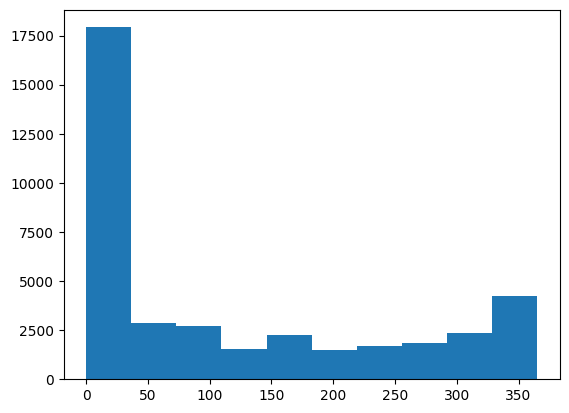

In [20]:
plt.hist(df.availability_365)

(array([3.3339e+04, 3.5060e+03, 1.2460e+03, 4.9400e+02, 1.4000e+02,
        6.7000e+01, 3.1000e+01, 1.2000e+01, 3.0000e+00, 5.0000e+00]),
 array([  1. ,  63.8, 126.6, 189.4, 252.2, 315. , 377.8, 440.6, 503.4,
        566.2, 629. ]),
 <BarContainer object of 10 artists>)

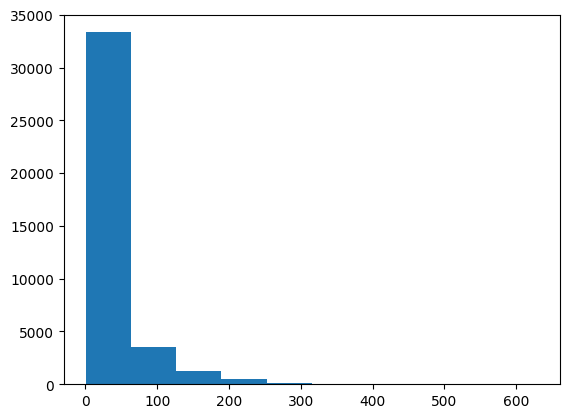

In [21]:
plt.hist(df.number_of_reviews)